In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import savReaderWriter as sav
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.core.display import display, HTML
import seaborn as sns
import pandas as pd
import numpy as np

# Legend and plots
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import unidecode
plt.rcParams.update({'font.size': 16})

C:\Users\Roberto\AppData\Local\Temp\ipykernel_10028\2461225152.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Importing data
with open( r'../../data/Endes/Nuevo_dataset/data_endes.pickle', 'rb') as f:
    df = pickle.load(f )

Check Unique ID

In [3]:
df

,CASEID,V000,V001,V002,V003,V004,V008,V009,V010,V011,...,V508,V509,V510,V511,V512,V513,V525,V613,V714,V715
0,000102701 1,PE6,1.0,27.0,1.0,1.0,1386.0,7.0,1985.0,1027.0,...,2001.0,1220.0,Month and year,16.0,13.0,10-14,15.0,4.0,Yes,3.0
1,000104301 1,PE6,1.0,43.0,1.0,1.0,1386.0,4.0,1974.0,892.0,...,2007.0,1290.0,Month and year,33.0,8.0,5-9,26.0,2.0,No,9.0
2,000104801 2,PE6,1.0,48.0,2.0,1.0,1386.0,1.0,1980.0,961.0,...,1998.0,1177.0,Month and year,18.0,17.0,15-19,18.0,1.0,Yes,11.0
3,000104801 3,PE6,1.0,48.0,3.0,1.0,1386.0,11.0,1999.0,1199.0,...,NaN,NaN,NaN,NaN,NaN,Never married,Not had intercourse,0.0,Yes,NaN
4,000105001 3,PE6,1.0,50.0,3.0,1.0,1386.0,8.0,1993.0,1124.0,...,NaN,NaN,NaN,NaN,NaN,Never married,21.0,2.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182863,325406201 2,PE6,3254.0,62.0,2.0,3254.0,1440.0,12.0,1971.0,864.0,...,1985.0,1032.0,Tiene mes y año,14.0,34.0,De 30 a más años,12.0,3.0,No,5.0
182864,325406301 2,PE6,3254.0,63.0,2.0,3254.0,1440.0,6.0,1988.0,1063.0,...,2002.0,1236.0,Tiene mes y año,14.0,17.0,De 15 a 19 años,12.0,3.0,No,7.0
182865,325407001 2,PE6,3254.0,70.0,2.0,3254.0,1440.0,7.0,1973.0,883.0,...,1986.0,1043.0,Tiene mes y año,13.0,33.0,De 30 a más años,12.0,4.0,No,5.0
182866,325407201 2,PE6,3254.0,72.0,2.0,3254.0,1440.0,12.0,1994.0,1140.0,...,2008.0,1301.0,Tiene mes y año,13.0,11.0,De 10 a 14 años,13.0,2.0,No,11.0


In [4]:
df.attrs['var_labels']  # get variable's label

{'2015': {'CASEID': 'Case Identification',
  'V000': 'Country code and phase',
  'V001': 'Cluster number',
  'V002': 'Household number',
  'V003': "Respondent's line number",
  'V004': 'Ultimate area unit',
  'V008': 'Date of interview (CMC)',
  'V009': "Respondent's month of birth",
  'V010': "Respondent's year of birth",
  'V011': 'Date of birth (CMC)',
  'V012': 'Current age - respondent',
  'V024': 'Region',
  'V102': 'Type of place of residence',
  'V120': 'Has radio',
  'V121': 'Has television',
  'V122': 'Has refrigerator',
  'V123': 'Has bicycle',
  'V124': 'Has motorcycle/scooter',
  'V125': 'Has car/truck',
  'V127': 'Main floor material',
  'V133': 'Education in single years',
  'year': 'Year of the survey',
  'V201': 'Total children ever born',
  'V218': 'Number of living children',
  'V301': 'Knowledge of any method',
  'V302': 'Ever use of any method',
  'V323': 'Brand of pill used',
  'V323A': 'Brand of condom used',
  'V325A': 'Cost of current method',
  'V326': 'Last s

Distribution of Age

In [5]:
df.V012  # age interview 

0         29.0
1         41.0
2         35.0
3         15.0
4         21.0
          ... 
182863    48.0
182864    31.0
182865    46.0
182866    25.0
182867    23.0
Name: V012, Length: 182868, dtype: float64

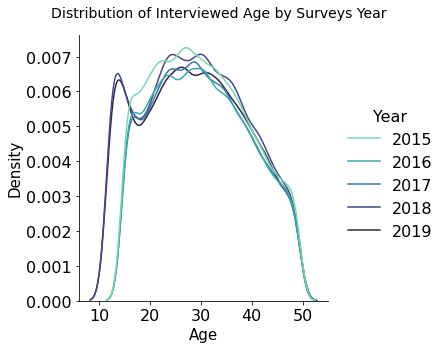

In [6]:
fig2 = sns.displot( data = df, x = 'V012', hue = 'year', 
            palette = sns.color_palette("mako_r", 5 ), 
           kind = "kde" )


# Make title
fig2.fig.subplots_adjust(top=0.9)
fig2.fig.suptitle( "Distribution of Interviewed Age by Surveys Year", 
                size = 14 )

# Change legend title
fig2._legend.set_title( "Year" )

# Set axis labels
fig2.set_axis_labels( "Age", "Density", size = 15 )


Distribution Total children ever born by place of residence

In [7]:
df.V102.unique()

array(['Urban', nan, 'Rural', 'Urbana', 'Urbano'], dtype=object)

In [8]:
df[ 'urban' ] = df.V102.copy()
df[ 'urban' ].replace( 'Urbana', 'Urbano', inplace = True )
df[ 'urban' ].replace( 'Urban', 'Urbano', inplace = True )

In [10]:
sns.color_palette("rocket", 5 )[::-1]

[(0.96443322, 0.67025402, 0.51509334),
 (0.94291042, 0.37549479, 0.26369821),
 (0.7965014, 0.10506637, 0.31063031),
 (0.51728314, 0.1179558, 0.35453252),
 (0.24525608, 0.10497384, 0.26395596)]

In [21]:
handles[0:yr]
labels[0:yr]

['2015', '2016', '2017', '2018', '2019']

Text(0, 0.5, 'Total children ever born')

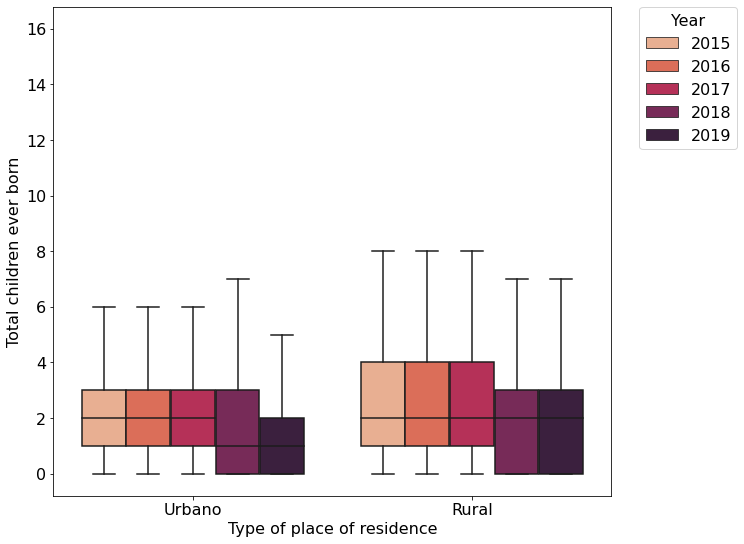

In [26]:
# Plot ploints

fig = plt.figure( figsize = ( 10, 9 ) )

# Plot boxplot
yx = sns.boxplot( y = "V201", hue = "year", 
                x = "urban", 
                data = df, 
                palette = sns.color_palette("rocket", 5 )[::-1], 
                fliersize = 0 )

# Number of labels
yr = df.year.unique().size

# Get legend labels and handles
handles, labels = yx.get_legend_handles_labels()

# When creating the legend, only use the first 5 elements
# to effectively remove the last.
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc=2, borderaxespad=0., title = "Year" )

# x label
plt.xlabel( "Type of place of residence" )
plt.ylabel( "Total children ever born" )

### Total children by cohort

In [37]:
print(min(df.V010))
max(df.V010)


1965.0


2007.0

Text(0.5, 0, "Respondent's year of birth")

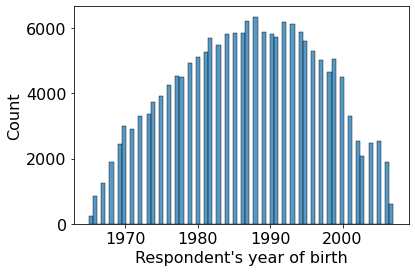

In [28]:
sns.histplot( data = df, x = 'V010')
plt.xlabel( "Respondent's year of birth" )

Text(0, 0.5, "Respondent's year of birth")

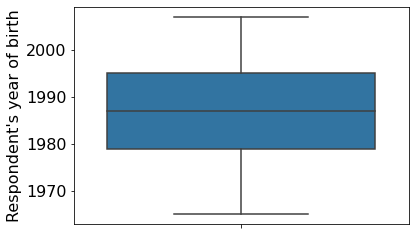

In [29]:
sns.boxplot( data = df, y = 'V010')
plt.ylabel( "Respondent's year of birth" )

In [124]:
def gen_cohot( series, size):
    
    min1 = int( ( ( series.min() ) / size) ) * size
    max1 = int( np.ceil( ( series.max() ) / size) ) * size
    result = np.arange( min1, max1 + 1 , size)
    labels = result[ 1: ]
    
    return result, labels

In [125]:
cohorts, labels = gen_cohot( df.V010 , 5)

In [126]:
cohorts

array([1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010])

In [127]:
df[ 'birth_cohort' ] = pd.cut( df.V010, bins  = cohorts, 
                              include_lowest = True)

In [128]:
df[ 'birth_cohort' ]

0         (1980.0, 1985.0]
1         (1970.0, 1975.0]
2         (1975.0, 1980.0]
3         (1995.0, 2000.0]
4         (1990.0, 1995.0]
                ...       
182863    (1970.0, 1975.0]
182864    (1985.0, 1990.0]
182865    (1970.0, 1975.0]
182866    (1990.0, 1995.0]
182867    (1995.0, 2000.0]
Name: birth_cohort, Length: 182868, dtype: category
Categories (9, interval[float64, right]): [(1964.999, 1970.0] < (1970.0, 1975.0] < (1975.0, 1980.0] < (1980.0, 1985.0] ... (1990.0, 1995.0] < (1995.0, 2000.0] < (2000.0, 2005.0] < (2005.0, 2010.0]]

In [129]:
df.V010

0         1985.0
1         1974.0
2         1980.0
3         1999.0
4         1993.0
           ...  
182863    1971.0
182864    1988.0
182865    1973.0
182866    1994.0
182867    1996.0
Name: V010, Length: 182868, dtype: float64

In [130]:
df[ 'birth_cohort' ] = pd.cut( df.V010, bins  = cohorts, labels = labels,
                              include_lowest = True)

In [131]:
df[ 'birth_cohort' ]

0         1985
1         1975
2         1980
3         2000
4         1995
          ... 
182863    1975
182864    1990
182865    1975
182866    1995
182867    2000
Name: birth_cohort, Length: 182868, dtype: category
Categories (9, int64): [1970 < 1975 < 1980 < 1985 ... 1995 < 2000 < 2005 < 2010]

<AxesSubplot:xlabel='birth_cohort', ylabel='Count'>

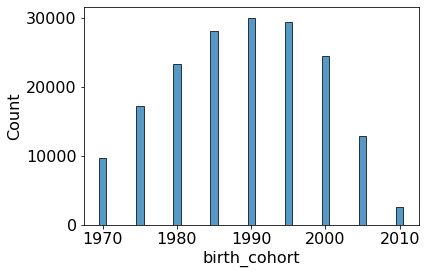

In [132]:
sns.histplot( data = df, x = 'birth_cohort')

In [133]:
df.V010

0         1985.0
1         1974.0
2         1980.0
3         1999.0
4         1993.0
           ...  
182863    1971.0
182864    1988.0
182865    1973.0
182866    1994.0
182867    1996.0
Name: V010, Length: 182868, dtype: float64

In [134]:
df[ 'birth_cohort' ]

0         1985
1         1975
2         1980
3         2000
4         1995
          ... 
182863    1975
182864    1990
182865    1975
182866    1995
182867    2000
Name: birth_cohort, Length: 182868, dtype: category
Categories (9, int64): [1970 < 1975 < 1980 < 1985 ... 1995 < 2000 < 2005 < 2010]

Text(0, 0.5, 'Total children ever born')

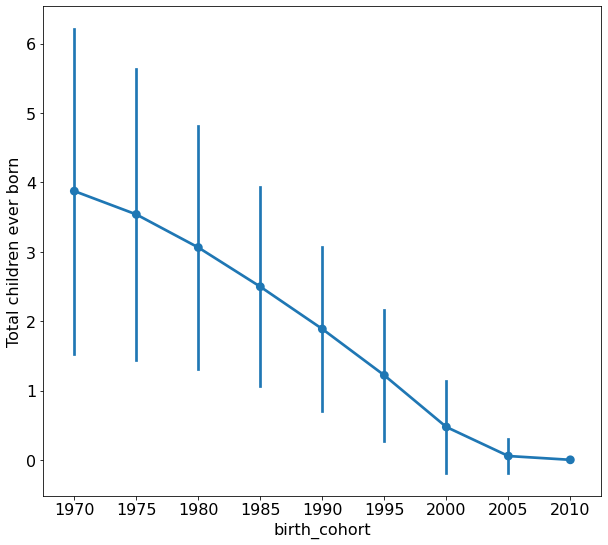

In [142]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd')

# x label
plt.ylabel( "Total children ever born" )

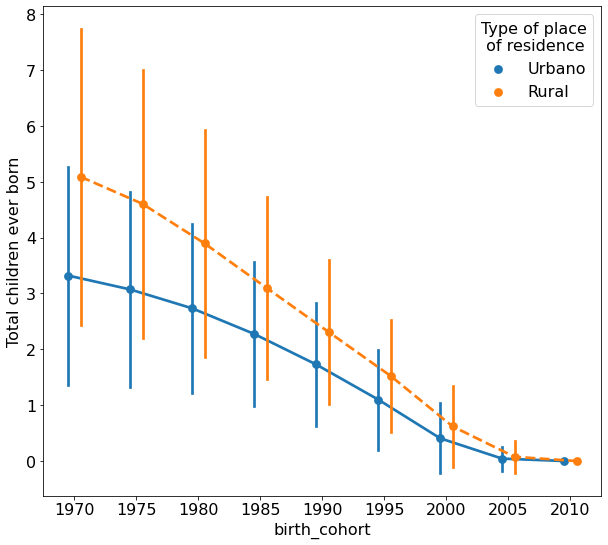

In [144]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'urban', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# x label
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Type of place\n of residence" )

## First sex relationship

In [145]:
df.V525.unique()

array([15.0, 26.0, 18.0, 'Not had intercourse', 21.0, 17.0, 16.0, 19.0,
       14.0, 22.0, 20.0, 13.0, nan, 'At first union', 24.0, 27.0, 10.0,
       12.0, 29.0, 25.0, 23.0, 11.0, 36.0, 33.0, 30.0, 35.0, 31.0, 28.0,
       38.0, 32.0, 7.0, 34.0, 8.0, 40.0, 37.0, 39.0, 44.0, 46.0, 41.0,
       42.0, 45.0, 47.0, 43.0, 48.0, 'No ha tenido relación sexual',
       'En la primera unión', 'Nunca tuvo relaciones sexuales',
       'En la primera union'], dtype=object)

In [146]:
df[ 'first_sex' ] = df.V525.copy()

In [147]:
df.first_sex.replace( 'Not had intercourse', np.nan, inplace = True )
df.first_sex.replace( 'No ha tenido relación sexual', np.nan, inplace = True )
df.first_sex.replace( 'Nunca tuvo relaciones sexuales', np.nan, inplace = True )
df.first_sex.replace( 'En la primera unión', 'At first union', inplace = True )
df.first_sex.replace( 'En la primera union', 'At first union', inplace = True )

In [148]:
# Filter values in variables

filter1 = df.first_sex == 'At first union'
df.loc[ filter1 , 'first_sex' ] = df.loc[ filter1 , 'V511' ]

In [149]:
df.first_sex = df.first_sex.astype( float )

Celaning region variable

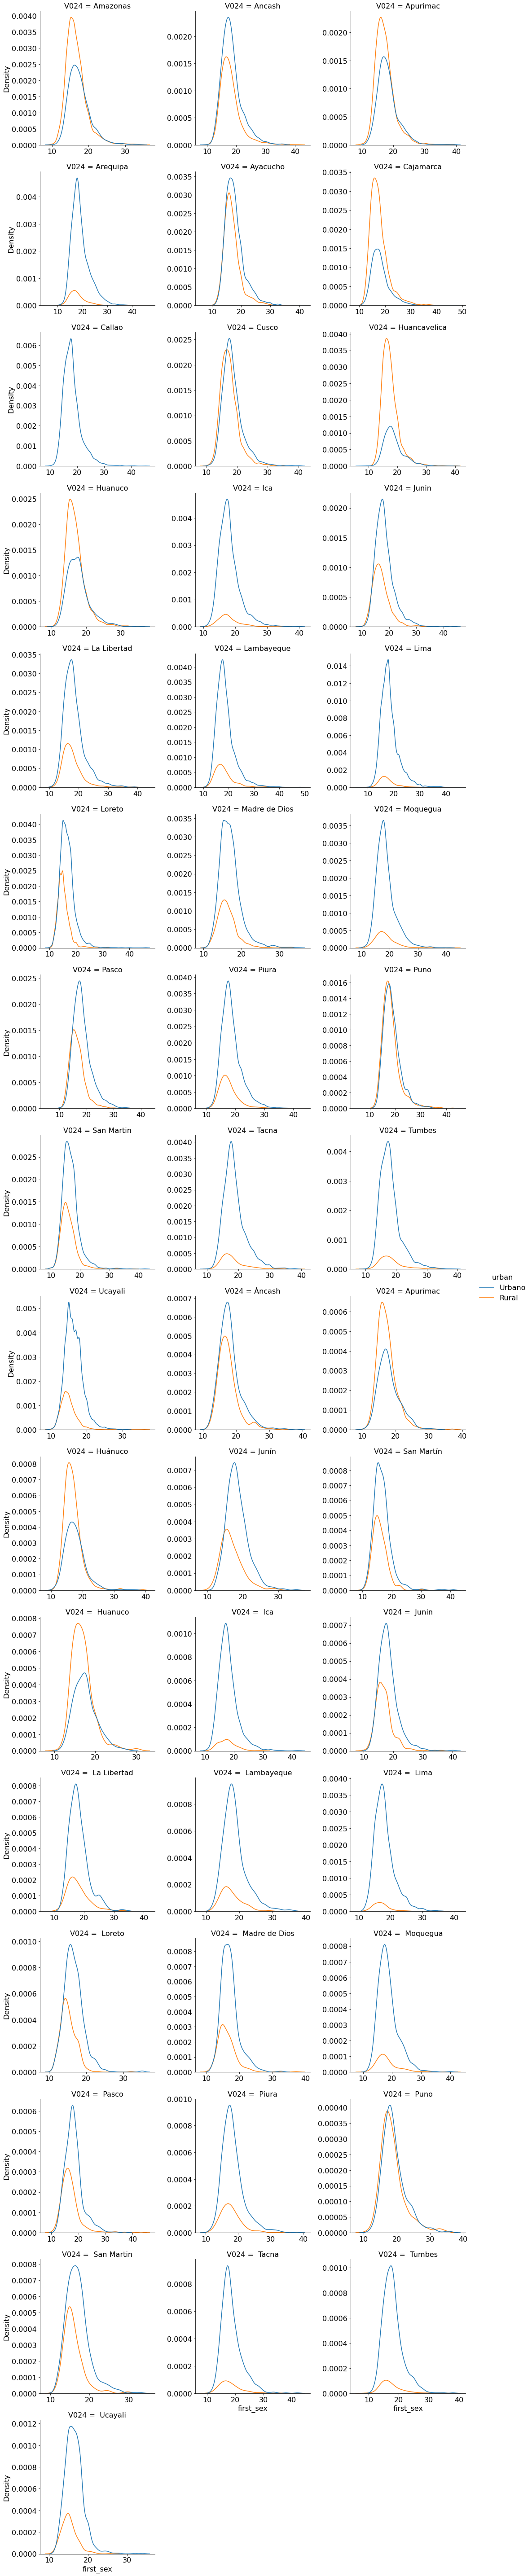

In [150]:
sns.displot( data = df, x = 'first_sex', 
            kind = 'kde', col = 'V024', 
            col_wrap = 3, 
            facet_kws = {'sharex' : False, 
                        'sharey' : False }, 
            hue = 'urban'
           )

In [151]:
df[ 'dpto' ] = df.V024.copy()

In [152]:
df.dpto = df.dpto.str.lstrip() \
            .str.replace( " ", "_" ) \
            .str.lower() \
            .apply( lambda x :  unidecode.unidecode( x ) )

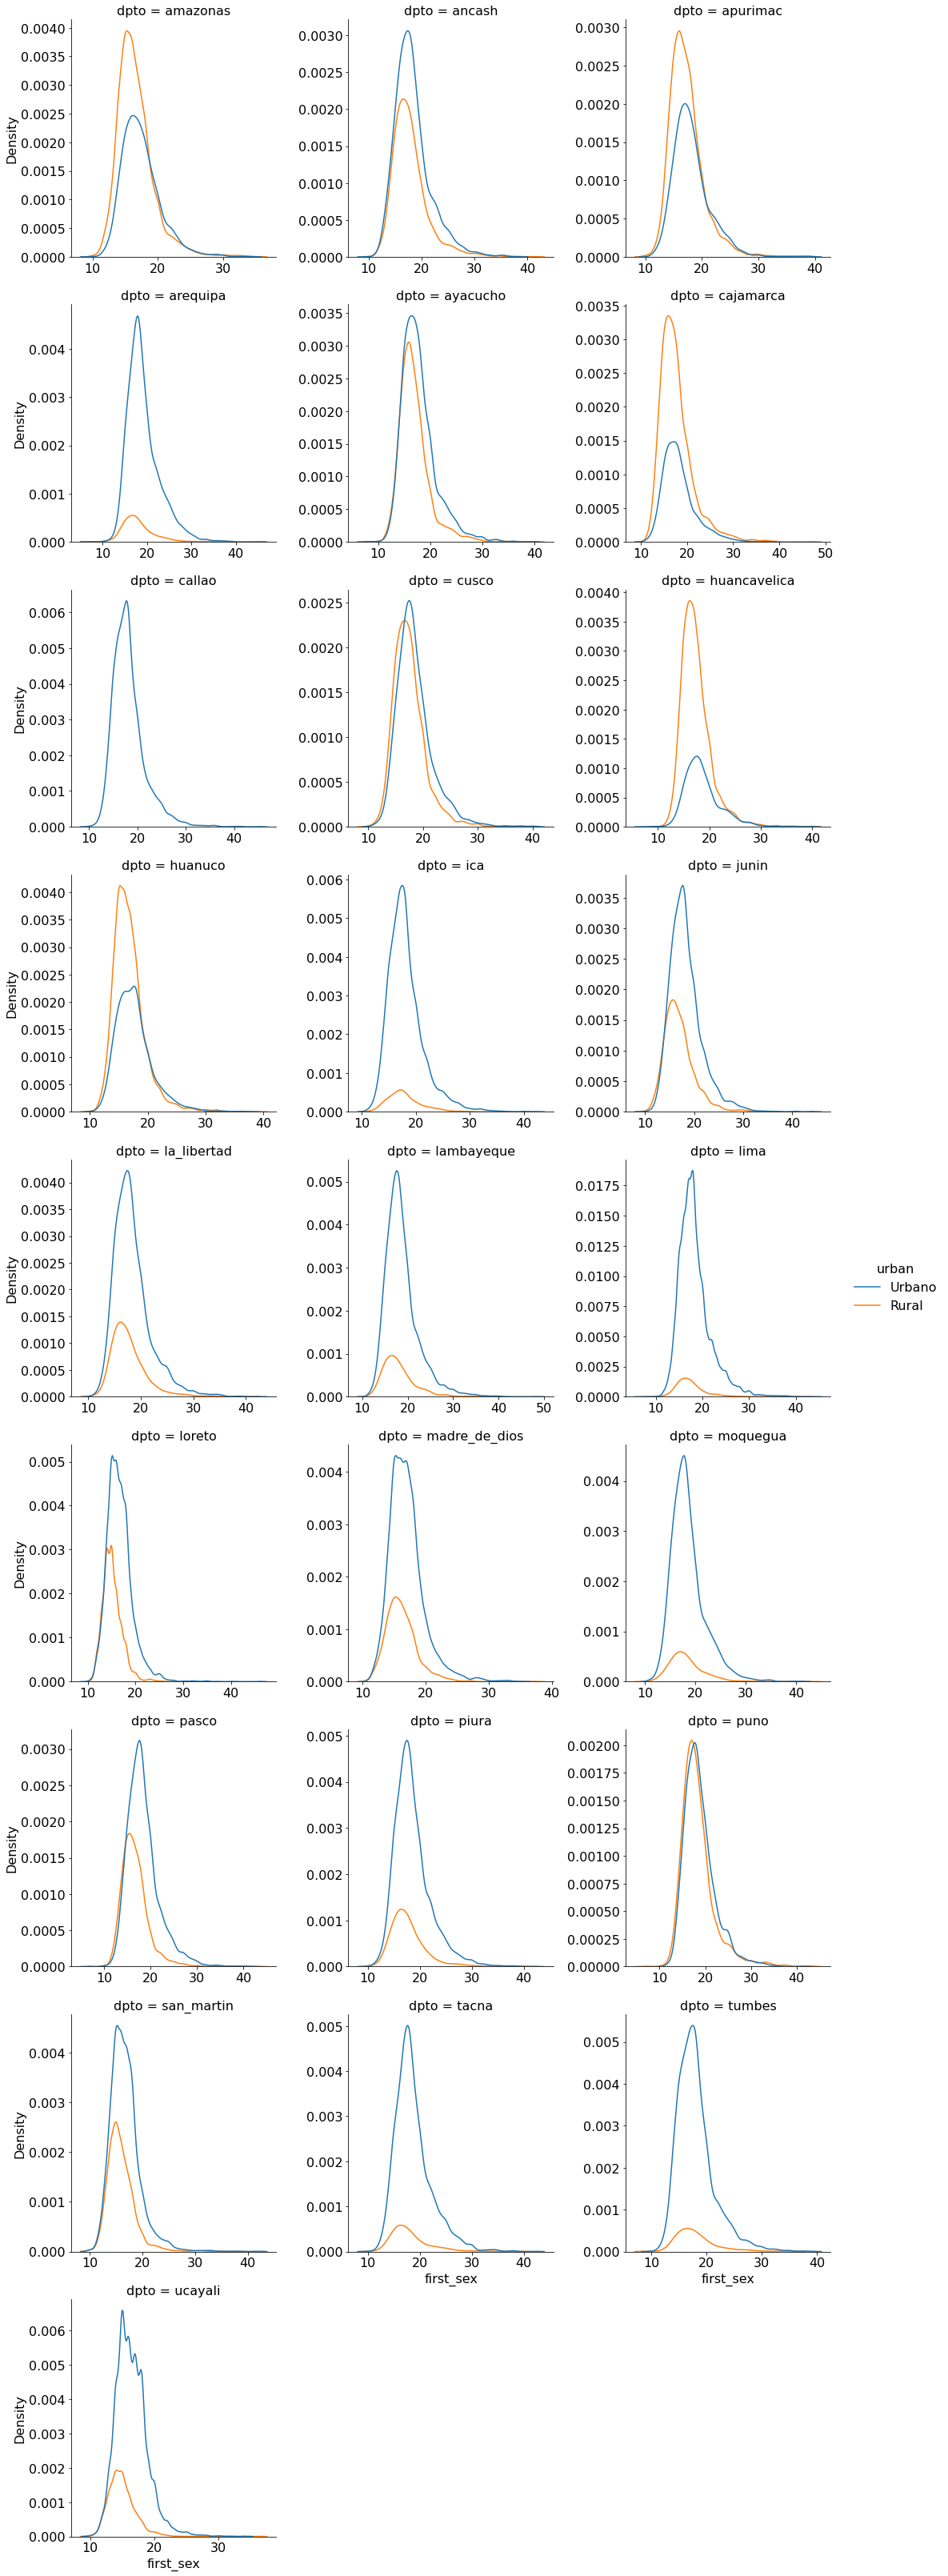

In [153]:
sns.displot( data = df, x = 'first_sex', 
            kind = 'kde', col = 'dpto', 
            col_wrap = 3, 
            facet_kws = {'sharex' : False, 
                        'sharey' : False }, 
            hue = 'urban'
           )

## Total children ever born by cohort and wife and husband education

In [154]:
df[ 'h_educ_yr' ] = df.V715.copy()

df.h_educ_yr.replace( 'No sabe', np.nan, inplace = True )
df.h_educ_yr.replace( "Don't know", np.nan, inplace = True )

In [155]:
df.loc[ ( df.V133 <= 12 ), 'w_educ' ] = 'Low'
df.loc[ ( df.V133 > 12), 'w_educ' ] = 'High'

df.loc[ ( df.h_educ_yr <= 12 ), 'h_educ_str' ] = 'Low'
df.loc[ ( df.h_educ_yr > 12), 'h_educ_str' ] = 'High'

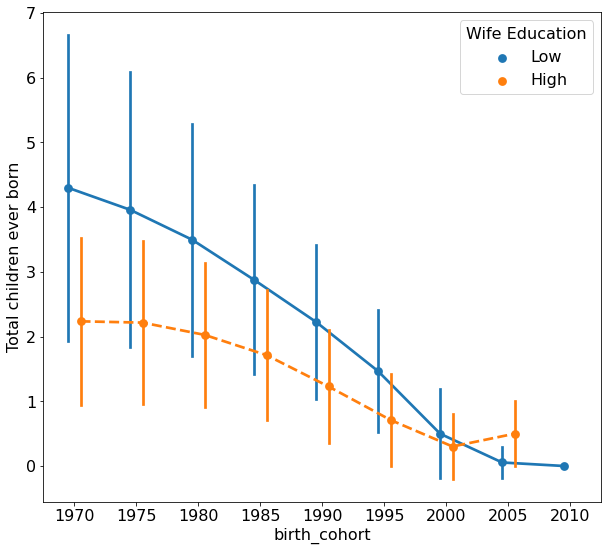

In [157]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'w_educ', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# x label
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Wife Education" )

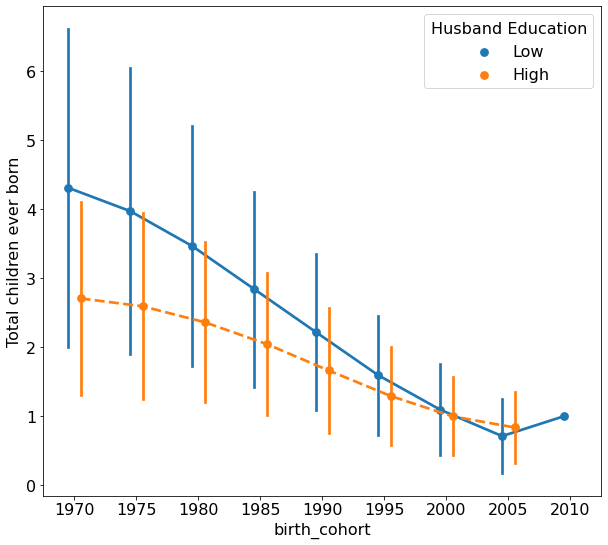

In [159]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "birth_cohort", y = "V201", 
               data = df, ci = 'sd', hue = 'h_educ_str', 
             dodge = 0.2, 
              linestyles = [ "-", "--" ] )

# ci: desviación stándar 

# x label
plt.ylabel( "Total children ever born" )

# Change legend title
plt.legend( title =  "Husband Education" )